In [ ]:
#Configuro el Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Importo las Librerias necesarias
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [ ]:
#Importo los datos con los que voy a trabajar
data = pd.read_excel("/content/gdrive/MyDrive/Maestria/Segundo Semestre/Metodos Estadisticos Avanzados/ACCIONES.xlsx", parse_dates=['Date'])
#Parse_dates nos ayuda a identificar la columna de fechas, importante para series de tiempo

In [ ]:
#Observo como quedan mis datos
data.head()

,Date,MICROSOFT,AAPL,FORD,TESLA,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y
0,1986-03-01,0.10,0.13,4.98,0.0,238.90,108.8,56.54,624.3,606.80,1.50,6.76,7.78
1,1986-04-01,0.11,0.14,4.60,0.0,235.52,108.6,56.57,647.0,614.37,1.40,6.24,7.30
2,1986-05-01,0.12,0.17,4.90,0.0,247.35,108.9,56.69,645.7,621.92,1.20,6.33,7.71
3,1986-06-01,0.11,0.16,5.03,0.0,250.84,109.5,56.50,662.8,627.89,1.21,6.40,7.80
4,1986-07-01,0.10,0.14,4.88,0.0,236.12,109.5,56.81,673.4,633.61,1.28,6.00,7.30


In [ ]:
#NOTA, otra forma de cargar los datos es dejando como indice la columna de fecha donde lo unico que cambiamos es el indice 
ser = pd.read_excel("/content/gdrive/MyDrive/Maestria/Segundo Semestre/Metodos Estadisticos Avanzados/ACCIONES.xlsx", parse_dates=['Date'], index_col='Date')
ser.head()

,MICROSOFT,AAPL,FORD,TESLA,SANDP,CPI,INDPRO,M1SUPPLY,CCREDIT,BMINUSA,USTB3M,USTB10Y
Date,,,,,,,,,,,,
1986-03-01,0.10,0.13,4.98,0.0,238.90,108.8,56.54,624.3,606.80,1.50,6.76,7.78
1986-04-01,0.11,0.14,4.60,0.0,235.52,108.6,56.57,647.0,614.37,1.40,6.24,7.30
1986-05-01,0.12,0.17,4.90,0.0,247.35,108.9,56.69,645.7,621.92,1.20,6.33,7.71
1986-06-01,0.11,0.16,5.03,0.0,250.84,109.5,56.50,662.8,627.89,1.21,6.40,7.80
1986-07-01,0.10,0.14,4.88,0.0,236.12,109.5,56.81,673.4,633.61,1.28,6.00,7.30


#Visualización de la serie de tiempo

In [ ]:
#Dibujaremos la serie de tiempo con matplotlib y definada en una función
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Price', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='crimson')
    plt.grid(color="black",linestyle=':', linewidth=0.5)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()  

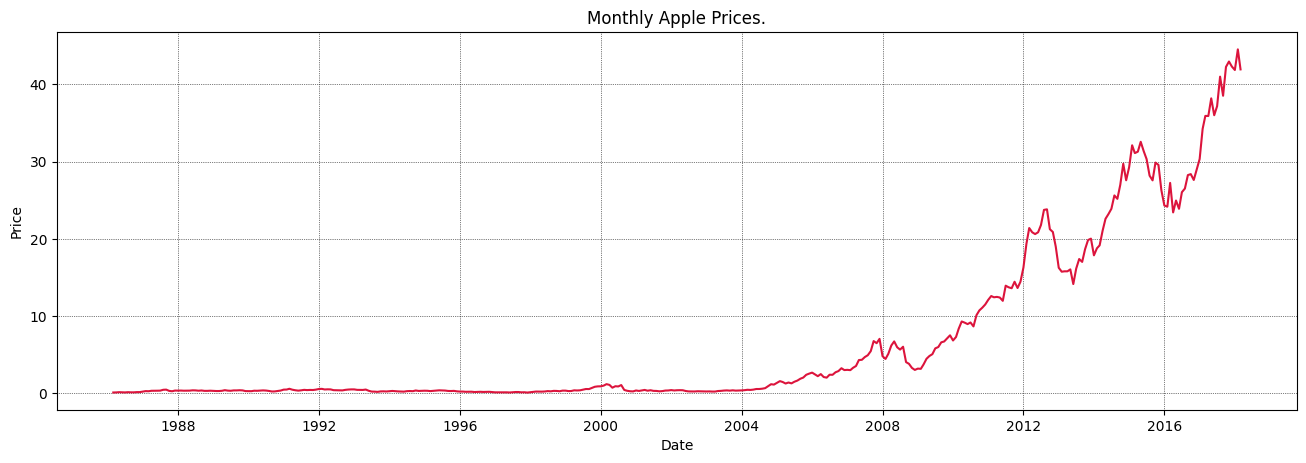

In [ ]:
#Graficamos la serie de tiempo del precio de las acciones de Apple
plot_df(ser, x=ser.index, y=ser.AAPL, title='Monthly Apple Prices.') 

Se observa como todos los valores son positivos por ende podemos hacer un espejo de la grafica para poder ver el crecimiento.

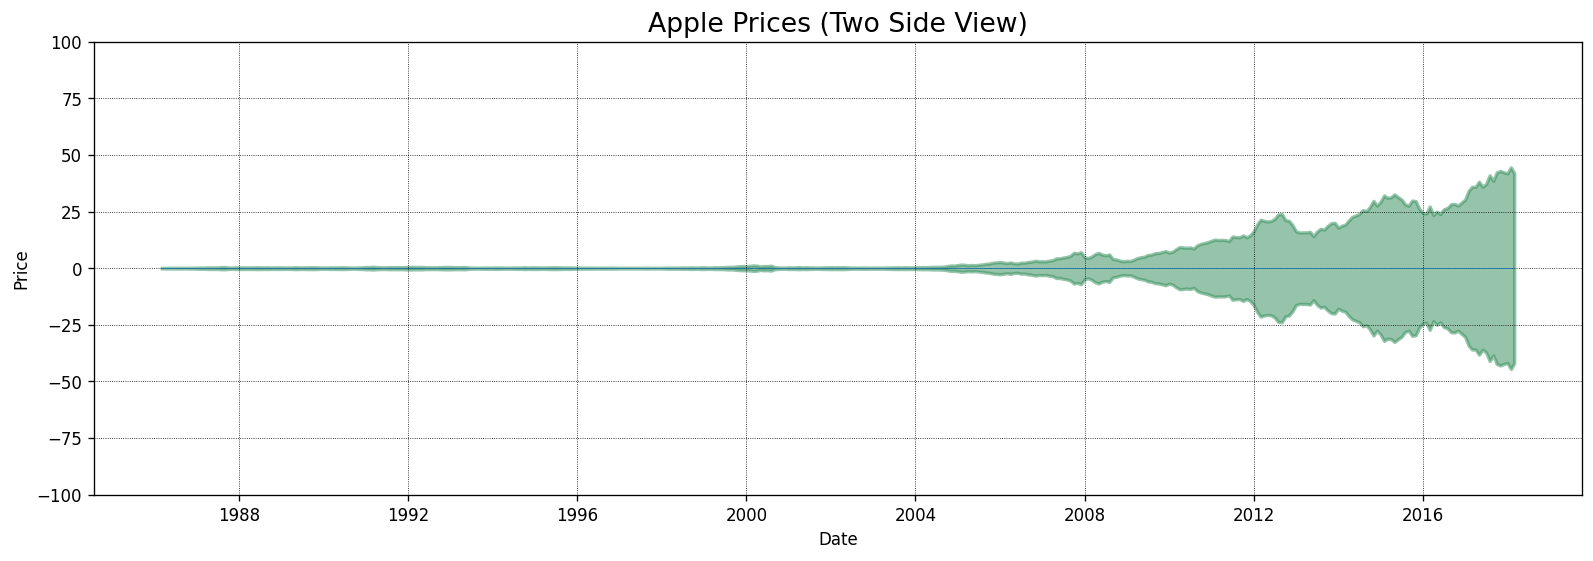

In [ ]:
#Ahora vamos a graficar los precios con el espejo
#Selecciono los datos
x = ser.index.values
y1 = ser['AAPL']

# Grafico
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-100, 100)
plt.title('Apple Prices (Two Side View)', fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(color="black",linestyle=':', linewidth=0.5)
plt.hlines(y=0, xmin=np.min(ser.index), xmax=np.max(ser.index), linewidth=.5)
plt.show()

Se puede observar en este caso como el precio de la acción tiene una tendencia alcista sobretodo en los ultimos años, pero no se alcanza a identificar de manera clara una estacionalidad aunque la serie tenga algunos picos o subidas cada dos años que puede deberse a la salida de productos que han sido altamente demandados por los consumidores.

#Grafica de la serie de tiempo por temporada

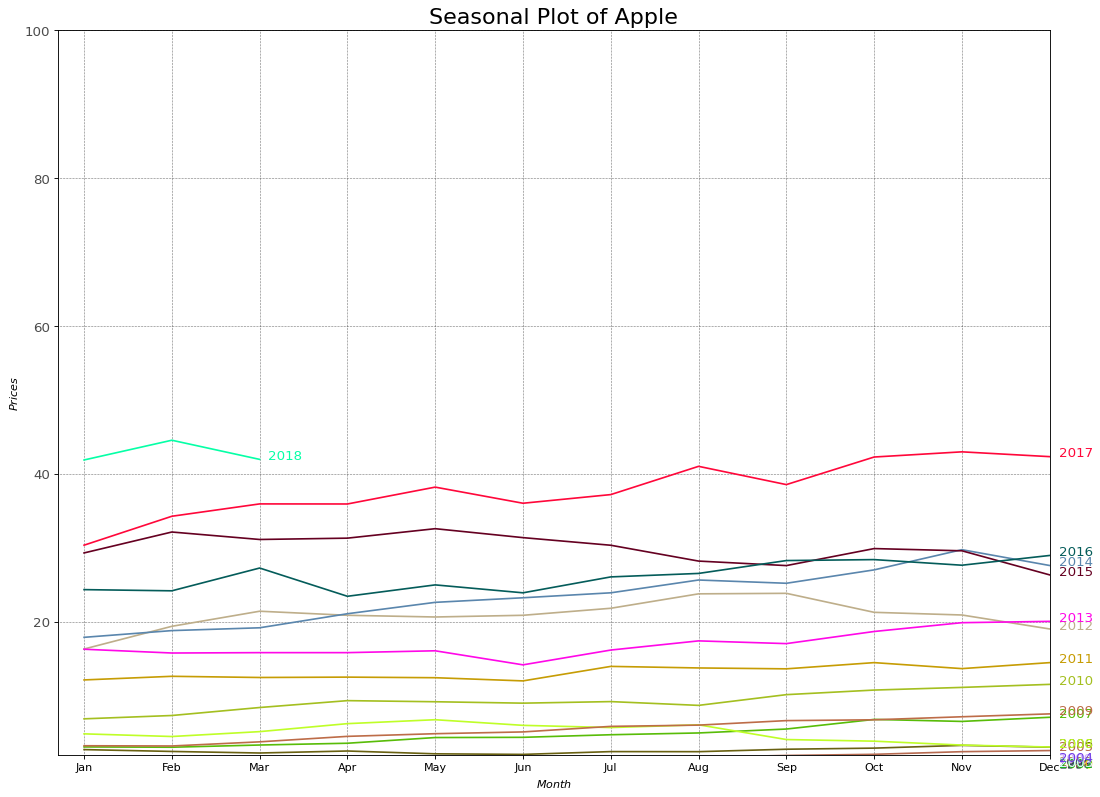

In [ ]:
#Importo los datos de nuevo
ser2 = pd.read_excel("/content/gdrive/MyDrive/Maestria/Segundo Semestre/Metodos Estadisticos Avanzados/ACCIONES.xlsx")

#Preparo los datos separando por años y meses
ser2['year'] = [d.year for d in ser2.Date]
ser2['month'] = [d.strftime('%b') for d in ser2.Date]
years = ser2['year'].unique()

#Traigo los colores para cada grafica por año
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

#Grafico con un for para que las graficas se superpongan
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'AAPL', data=ser2.loc[ser2.year==y, :], color=mycolors[i], label=y)
        plt.text(ser2.loc[ser2.year==y, :].shape[0]-.9, ser2.loc[ser2.year==y, 'AAPL'][-1:].values[0], y, fontsize=12, color=mycolors[i])

#Decoro la grafica
plt.gca().set(xlim=(-0.3, 11), ylim=(2,100), ylabel='$Prices$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Apple", fontsize=20)
plt.grid(color="black",linestyle=':', linewidth=0.5)
plt.show()

Boxplot para la distribución mensual (para temporadas) y anual (para la tendencia)

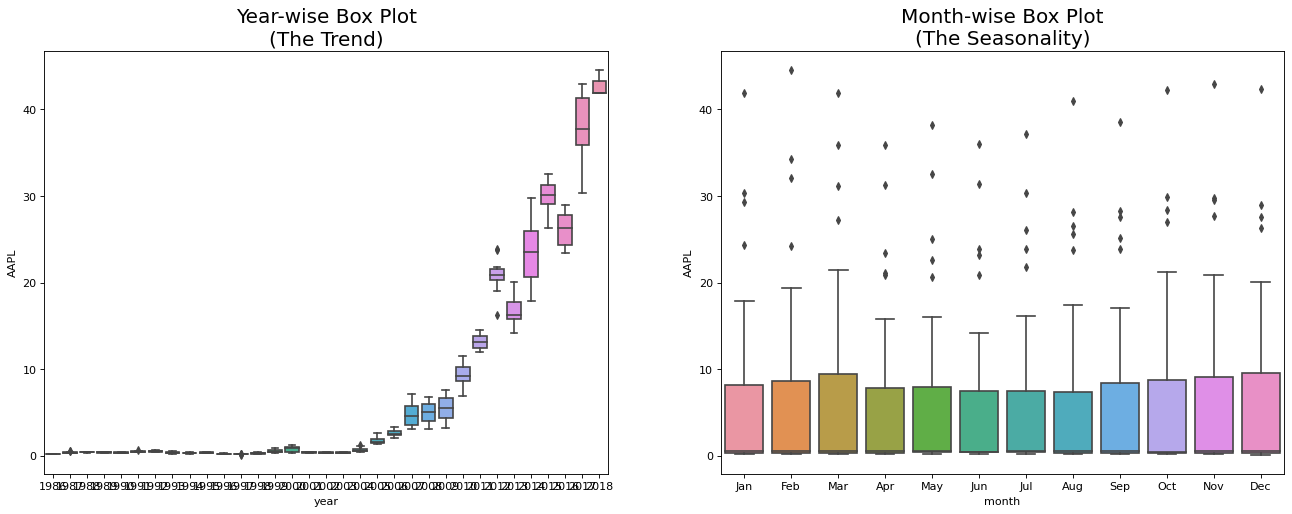

In [ ]:
#Creo la figura
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#Boxplot para el año
sns.boxplot(x='year', y='AAPL', data=ser2, ax=axes[0])
#Boxplot para el mes
sns.boxplot(x='month', y='AAPL', data=ser2.loc[~ser2.year.isin([1986, 2019]), :])
#Isin me dice si el datose encuentra o no en el dataframe y me devulve un booleano, en este caso cuando agrego ~ me dice si efectivamente el dato no se encuentra en el dataframe

#Coloco los titulos
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

De la primera grafica se observa como hay una tendencia alcsita en el precio de la acción de Apple y sobre todo si tenemos en cuenta cada año vemos como la caja y los bigotes van aumentando lo cual implica que el precio de la acción se movio en un rango mayor durante ese año y encontramos que hay un año donde existen datos fuera de la caja, en la segunda podemos ver que debido a que el precio de la acción durante mucho tiempo estuvo por debajo de los 10 dolares se encuentran muchos datos fuera de los bigotes de la caja, esto se debe a el crecimiento que tuvo el precio en los ultimos años y tambien se encuentra que hay un crecimiento de el precio entre los meses de octubre a marzo mientras que los meses entre abril y septiembre el precio sule occilar en valores más bajos, esto se puede deber a que los meses que suele usar la compañia para sacar sus productos claves en los ultimos años suelen ser los ultimos y los primeros meses del año, lo cual afecta positivamente el precio de la acción.

#Como descomponer una serie de tiempo en sus componentes (Estos pueden ser aditivos o multiplicativos)

In [ ]:
#Los componentes de una serie de tiempo seran: El nivel de base, la tendencia, la estacionalidad y el error, podemos hacer la descomposición de una serie de tiempo como una combinación multiplicativa o aditiva
#El codigo de seasonal_decompose de la libreria de statsmodels nos sirve para esto
#Primero importo la libreria
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

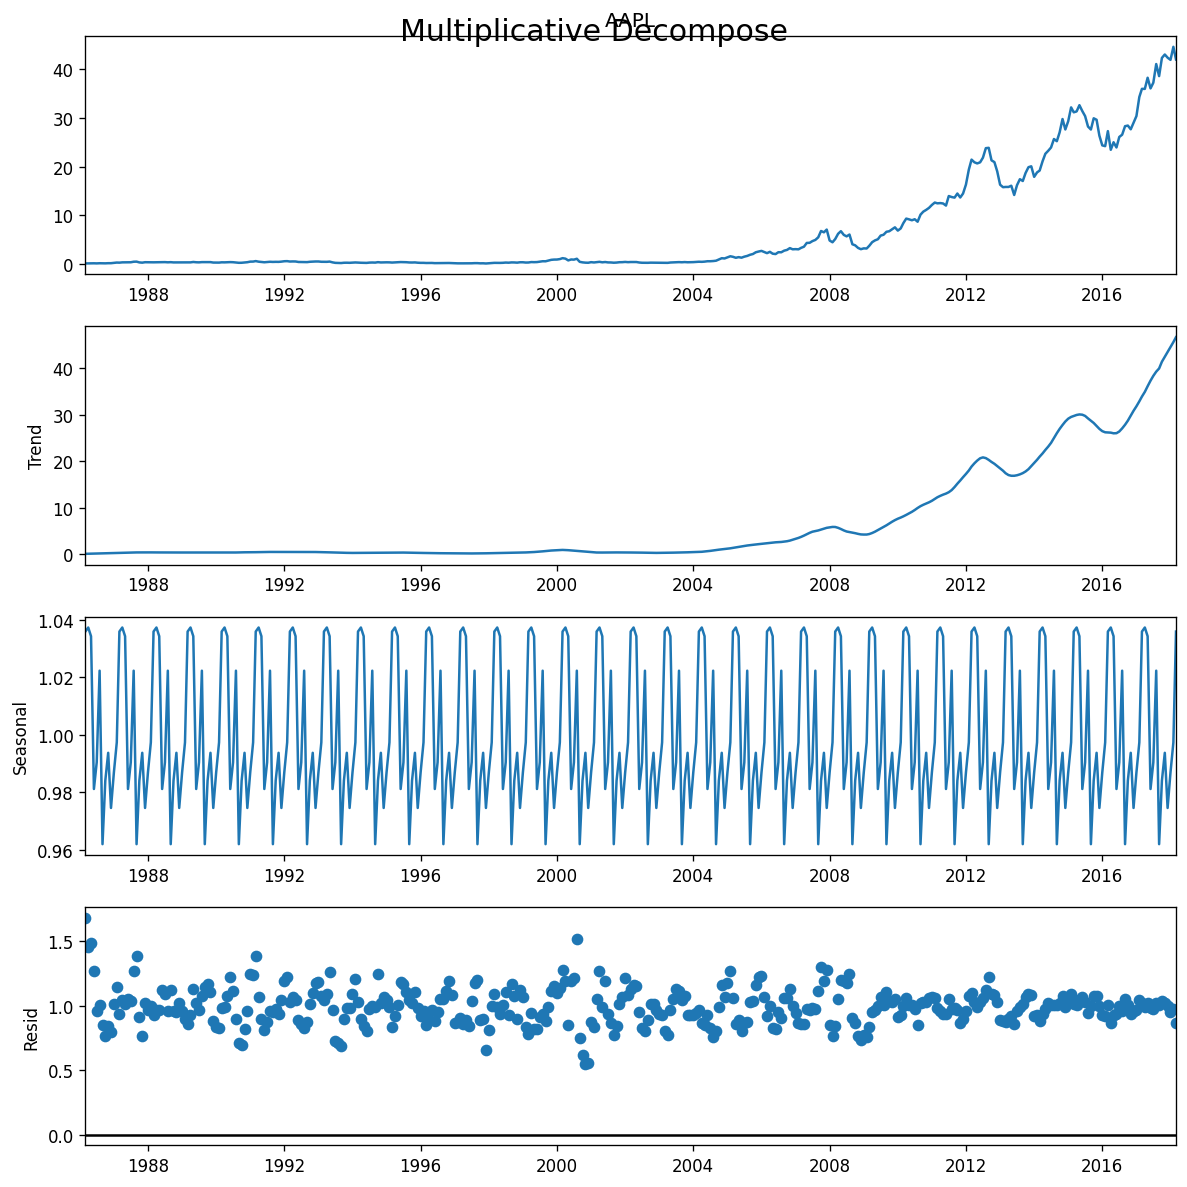

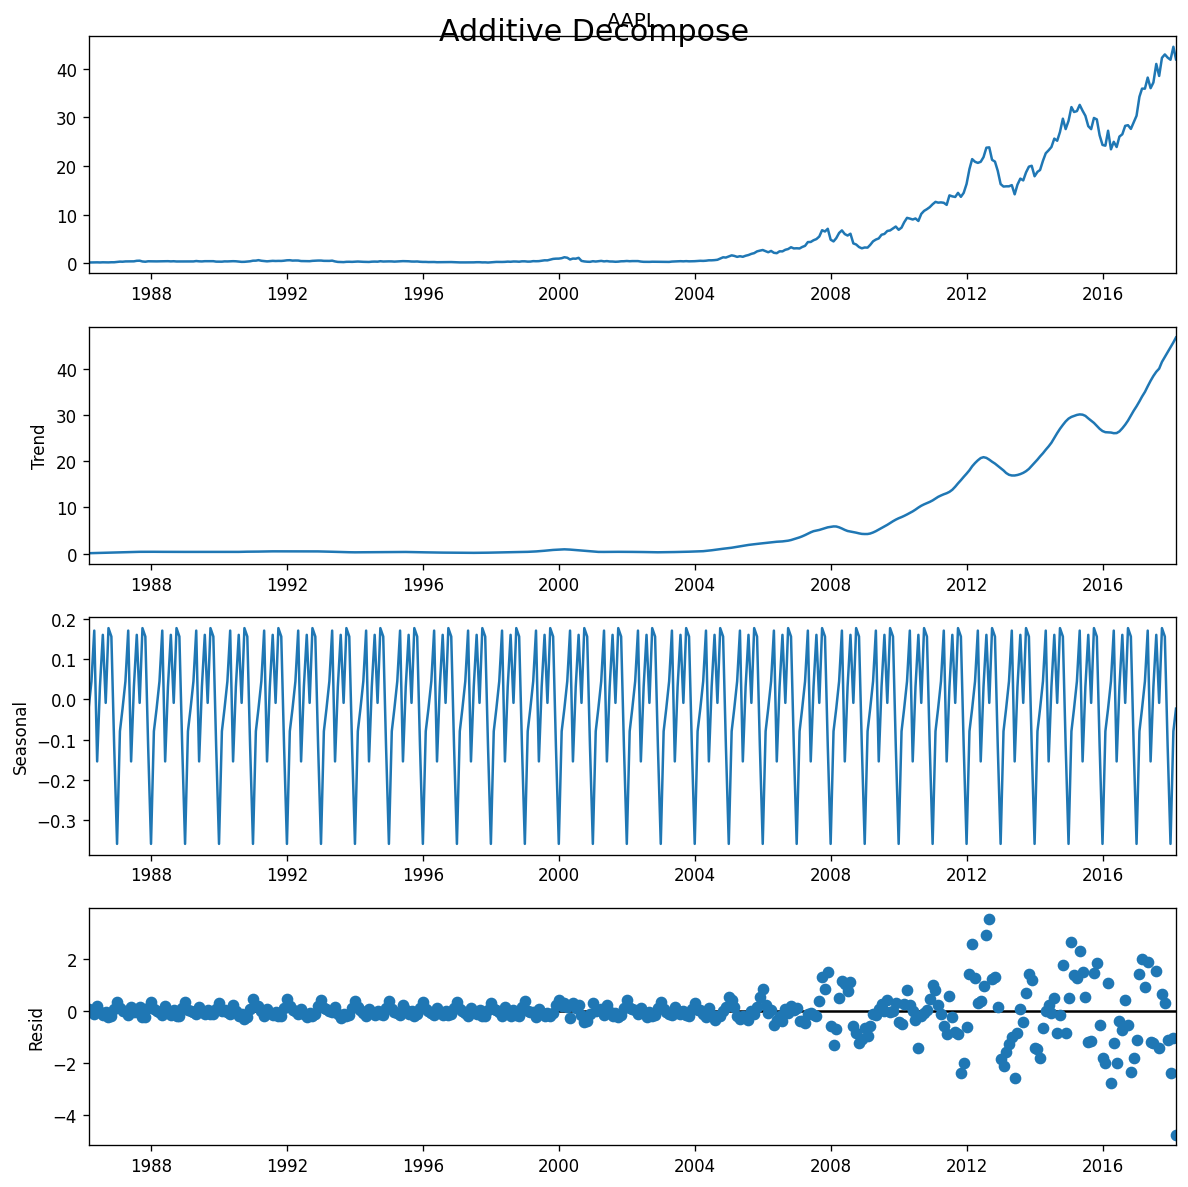

In [ ]:
#Ahora lo que busco es observar la descomposición multiplicativa, siempre le tengo que especificar que tipo de descomposición quiero con la opción de model
result_mul = seasonal_decompose(ser['AAPL'], model='multiplicative', extrapolate_trend='freq')

#Ahora obtengo la descompocisión aditiva
result_add = seasonal_decompose(ser['AAPL'], model='additive', extrapolate_trend='freq')

#Grafico las descomposiciones
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=18)
result_add.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

De esta grafica podemos observar como existe una tendencia alcista en ambas formas de expresar la serie de tiempo en el componente tendencial pero destacamos que en ambos casos los residuos parece ser que la descomposición aditiva tiene un leve patron durante los primeros años y luego tiene un componente más aleatorio donde el rango donde se mueve el residuo incrementa, por su lado el multiplicativo se mueve en un rango menor y parece ser que tiene un comportamiento más aleatorio, por ultimo observamos como el componente "seasonal" de la serie multiplicativa no se encuentra un crecimiento en el largo del tiempo si no un movimiento constante por ende no podemos concluir que esta serie siga una expresión multiplicativa al 100% y es probable que siga una forma combinada entre multiplicativa y aditiva aunque más multiplicativa.

In [ ]:
#Ahora lo que queremos agregar es los datos de tendencia, errores y estacionalidad a mi dataset construyendo uno nuevo con el modelo multiplicativo
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()
#Se puede observar que al multiplicar las variables de tendencia, estacionalidad y residuo obtenemos el valor de la acción para ese momento en el tiempo

,seas,trend,resid,actual_values
Date,,,,
1986-03-01,1.035930,0.074588,1.682463,0.13
1986-04-01,1.037345,0.092640,1.456823,0.14
1986-05-01,1.034305,0.110692,1.484855,0.17
1986-06-01,0.981137,0.128744,1.266668,0.16
1986-07-01,0.990425,0.146796,0.962923,0.14


#Series de tiempo Estacionarias y No-Estacionaria

La estasionaridad es una propiedad de las series de tiempo, una serie de tiempo es estcionaria cuando los valores de la serie no son una función del tiempo, esto significa que la media (Momento 1), la varianza (Momento 2) y la autocorrelación (Momento 3) son constantes sobre el tiempo.

IMPORTANTE: Una serie temporal estacionaria tambien carece o no posee efectos estacionales.

#Como identificar si la serie de tiempo es estacionaria o no

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test (Test de Dickey  Fuller)
result = adfuller(ser.AAPL.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test 
result = kpss(ser.AAPL.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')

#IMPORTANTE: Hay que tener en cuenta que rechazamos la hipotesis nula de que la serie es no estacionaria solo cuando nuestro P-valor es menor a 0.05, en el caso del teste de Dickey Fuller

ADF Statistic: 3.3673194659314443
p-value: 1.0
Critial Values:
   1%, -3.448147967010838
Critial Values:
   5%, -2.8693833397824413
Critial Values:
   10%, -2.5709483564645725

KPSS Statistic: 2.247559
p-value: 0.010000
Critial Values:
Critial Values:
Critial Values:
Critial Values:


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


De el test de Dickey Fuller podemos concluir que la serie es no estacionaria ya que el p-valor que obtuvimos es igual a 1 y este es mayor a 0.05 por ende no podemos rechazar la hipotesis nula de que la serie es no estacionaria, el test de KPSS por su lado sigue la linea del de Dickey Fuller señalando que la serie es no estacionaria.  

##Como quitar la tendencia de una serie de tiempo

Text(0.5, 1.0, 'Apple detrended by subtracting the least squares fit')

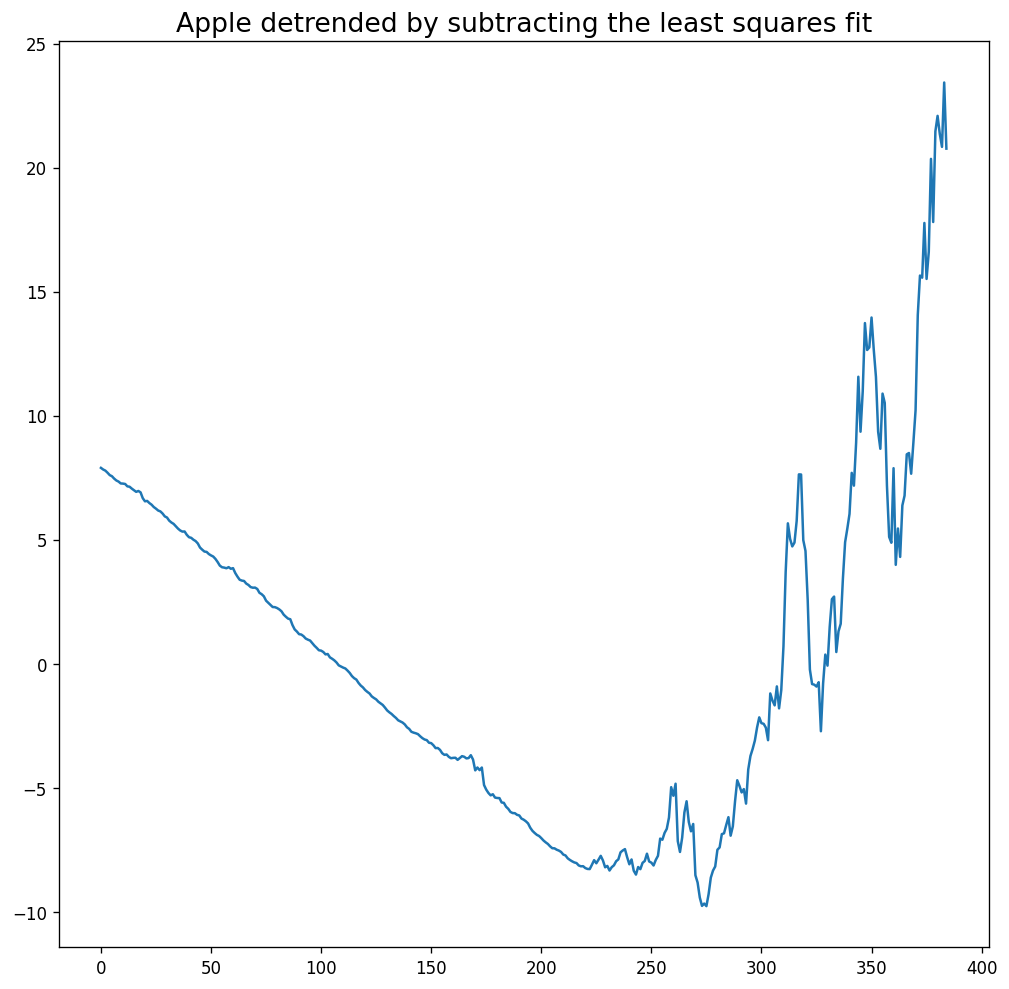

In [ ]:
#Una opción es substrayendo la la linea de mejor ajuste del modelo
#UEsto se logra importando la libreria de Scipy 
from scipy import signal

detrended = signal.detrend(ser.AAPL.values)
plt.plot(detrended)
plt.title('Apple detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Apple detrended by subtracting the trend component')

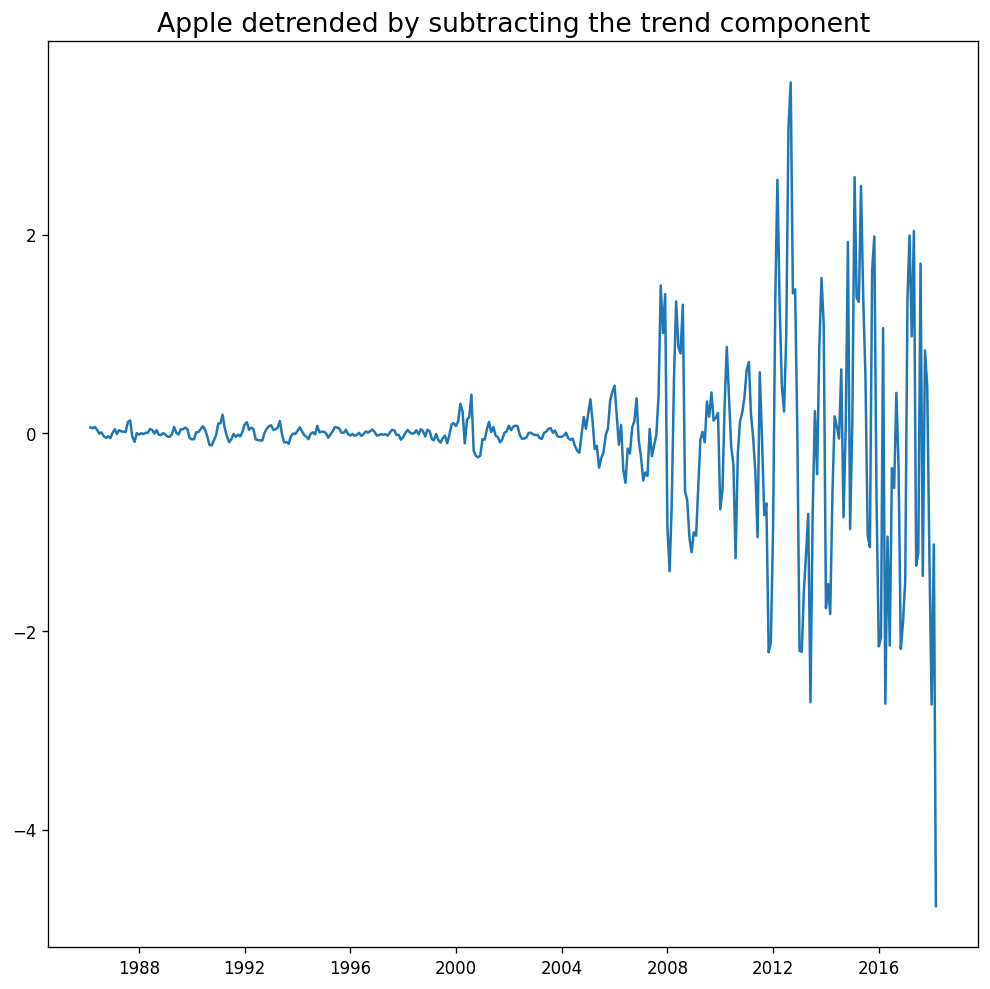

In [ ]:
#Ahora lo que hizimos fue susbtraer el componente de tendencia de la serie usando la libreria de statsmodels y la opcion de seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(ser['AAPL'], model='multiplicative', extrapolate_trend='freq')

detrended = ser.AAPL.values - result_mul.trend

plt.plot(detrended)
plt.title('Apple detrended by subtracting the trend component', fontsize=16)

#Como eliminar la estacionalidad de una serie de tiempo

La estacionalidad se puede eliminar de varias formas, estas son algunas de esas formas de eliminarla:

1. Tomar la media movil con la longitud como la ventana de estacionalidad.
2. Hacer una diferencia entre estaciones, le extraigo el valor de la estacionalidad anterior a el valor actual.
3. Divido la serie por el indice de estacionalidad obtenido por la descomposicion de STL

[]

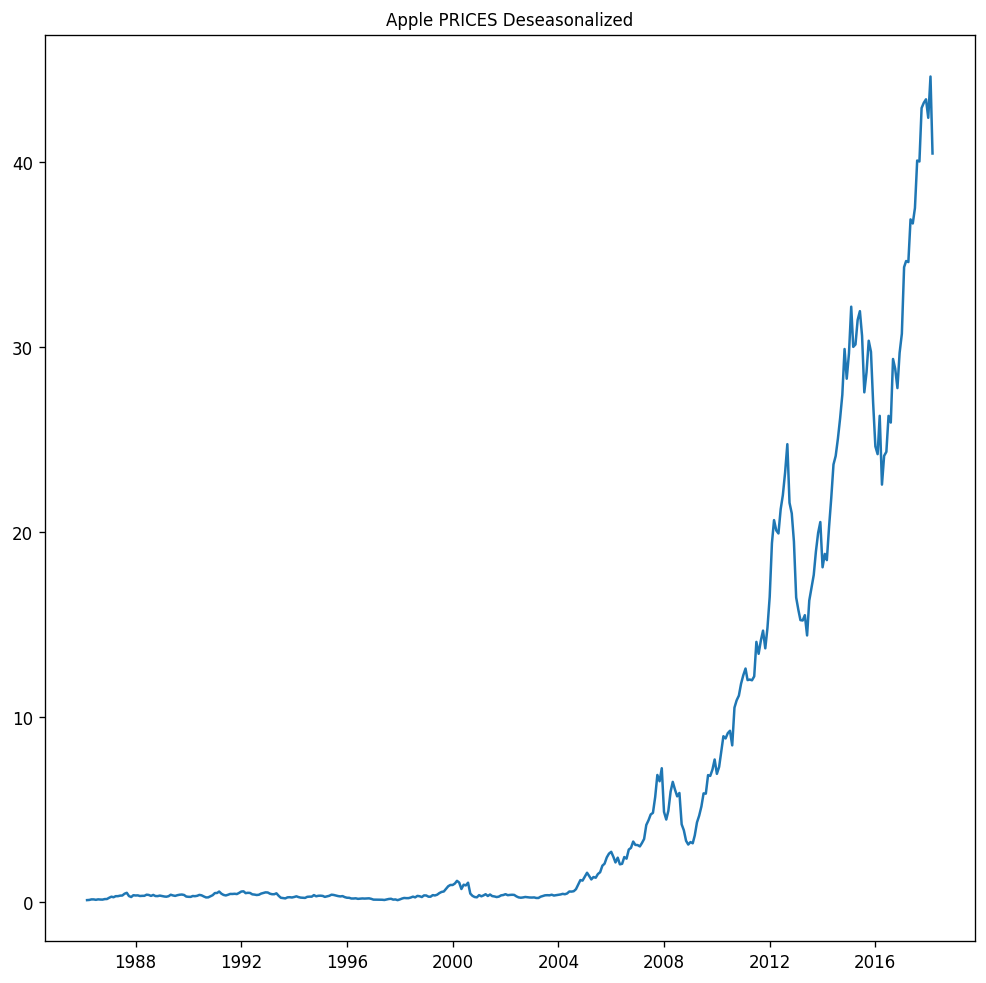

In [ ]:
#Substrayendo el componente de tendencia

#Descomposición de la serie de tiempo multiplicativa
result_mul = seasonal_decompose(ser['AAPL'], model='multiplicative', extrapolate_trend='freq')

#Elimino la tendencia diciviendo al valor actual el componente de tendencia
deseasonalized = ser.AAPL.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Apple PRICES Deseasonalized', fontsize=10)
plt.plot()

#Como probar la estacionalidad de una serie de tiempo?



Un metodo es la revisión de las graficas por tiempo para poder encontrar patrones en horas, días, meses o años pero si se busca una manera definitiva para testear la estacionalidad se debe usar la grafica de función de autocorrelación.

IMPORTANTE: En el mundo real los datasets con patrones fuertes son dificiles de ver o pueden ser distorcionados por un ruido, así que se necesita un ojo agudo para capturar los patrones.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

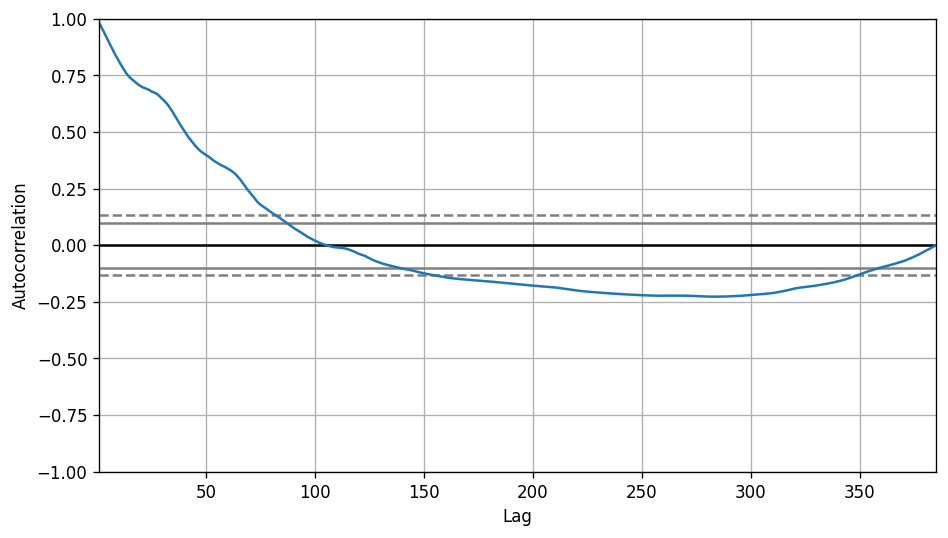

In [ ]:
#Importo la libreria necesaria para graficar la autocorrelación.
from pandas.plotting import autocorrelation_plot

# Grafico
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(ser.AAPL.tolist())

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


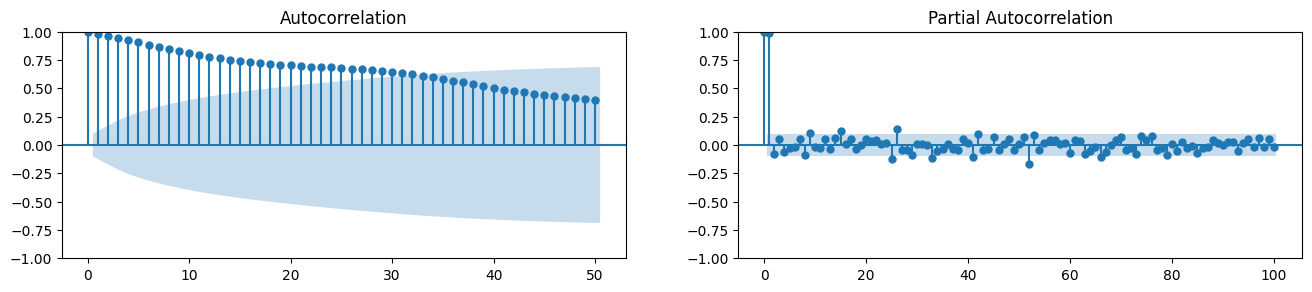

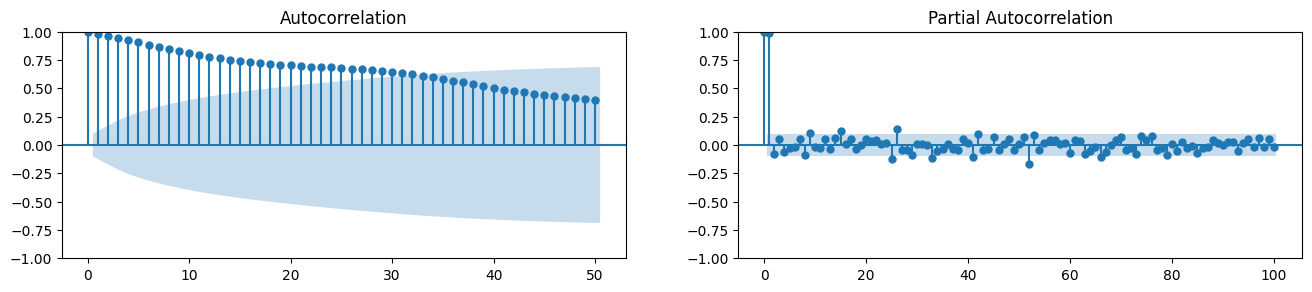

In [ ]:
#Ahora busco calcular las autocorrelaciones parciales 

#Importo las librerias
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Calculo la autocorrelación y la autocorrelación parcial hasta 50 lags
#acf_50 = acf(ser.AAPL.value, nlags=50)
#pacf_50 = pacf(ser.AAPL.value, nlags=50)

#Grafico
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(ser.AAPL.tolist(), lags=50, ax=axes[0])
plot_pacf(ser.AAPL.tolist(), lags=100, ax=axes[1])

Podemos observar como existe una fuerte autocorrelación parcial y autocorrelación en los primeros resagos de la serie de tiempo ya que el coeficiente de estos dos primeros es igual a 1 en el primer caso y muy cercana a 1 en el segundo resago.

#Graficamos los Lags

Una grafica de Lags es una grafica de puntos de una serie de tiempo contra el lag de el mismo, es usada para observar la autocorrelación, si existe algún patron en la serie significa que la serie esta autocorrelacionada, si no se puede observar dicho patron significa que la serie puede ser un ruido blanco.

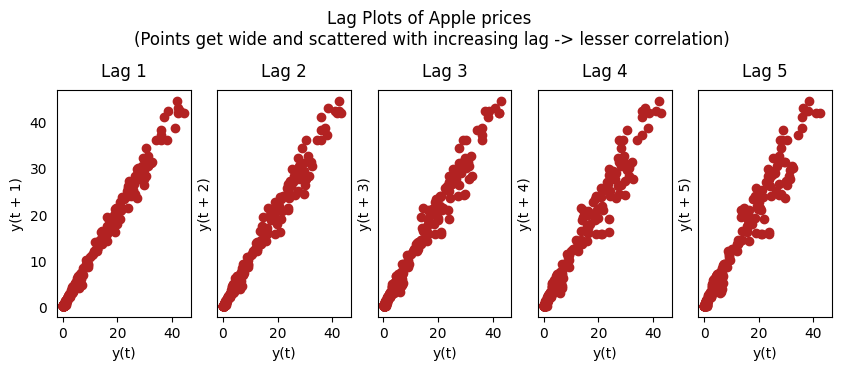

In [ ]:
#Importamos de pandas.plotting el codigo que me permita graficar los lags
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

#Grafico
fig, axes = plt.subplots(1, 5, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:5]):
    lag_plot(ser.AAPL, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Apple prices \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    
  
plt.show()

En este caso encontramos un patron en los primeros 3 lags de la serie mientras que a partir del 4 y 5 lag encontramos como la seria sigue un curso pero los puntos se van separando cada vez más del patron por lo que podemos concluir que la serie esta autocorrelacionada y no es un ruido blanco.

#Por que y como suavizamos una serie de tiempo?

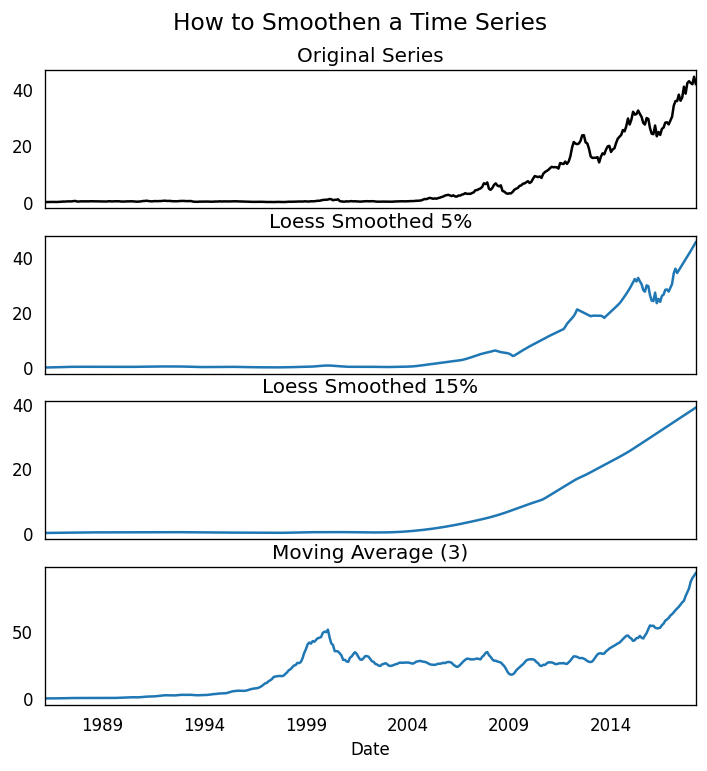

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average
df_ma = ser.MICROSOFT.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(ser.AAPL, np.arange(len(ser.AAPL)), frac=0.05)[:, 1], index=ser.index, columns=['AAPL'])
df_loess_15 = pd.DataFrame(lowess(ser.AAPL, np.arange(len(ser.AAPL)), frac=0.15)[:, 1], index=ser.index, columns=['AAPL'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
ser['AAPL'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['AAPL'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['AAPL'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(ser[['AAPL', 'SANDP']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1817  , p=0.2777  , df_denom=381, df_num=1
ssr based chi2 test:   chi2=1.1911  , p=0.2751  , df=1
likelihood ratio test: chi2=1.1892  , p=0.2755  , df=1
parameter F test:         F=1.1817  , p=0.2777  , df_denom=381, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1723  , p=0.3108  , df_denom=378, df_num=2
ssr based chi2 test:   chi2=2.3756  , p=0.3049  , df=2
likelihood ratio test: chi2=2.3682  , p=0.3060  , df=2
parameter F test:         F=1.1723  , p=0.3108  , df_denom=378, df_num=2


{1: ({'ssr_ftest': (1.1817482263411614, 0.27768762060039615, 381.0, 1),
   'ssr_chi2test': (1.19105333048558, 0.27511718998776785, 1),
   'lrtest': (1.1892099952719946, 0.2754889675260554, 1),
   'params_ftest': (1.1817482263367753, 0.27768762060128344, 381.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.172276727902511, 0.31078430670257423, 378.0, 2),
   'ssr_chi2test': (2.375566067654295, 0.30489646048546665, 2),
   'lrtest': (2.3682291394943604, 0.306017016301579, 2),
   'params_ftest': (1.1722767279024016, 0.3107843067025949, 378.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

En este caso con el tes de causalidad de granger podemos concluir que los resagos de x no son utiles para la predicción del precio de la acción de Apple debido a que su P-Valor es mayor a el nivel de significacncia de 0.05.